# (Work)Sheet just got real
now it's time to get a taste of real exploratory data science.

download the file from http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls, and read it as a pandas dataframe

Column description:
- survival: Survival (0 = no; 1 = yes)
- class: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)

Use the time you have to explore it and derive conclusions. Can you predict survival rates? Anything interesting you can say about the data? Plot it, dissect it, be creative. **GO**

The following lines auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading)

In [166]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
file_name = "titanic3.xls"
df = pd.read_excel(io=file_name)
print(df.head(5))

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [168]:
print('survival rate: ' + str(round(df['survived'].mean() * 100, 2)) + " percent")

survival rate: 38.2 percent


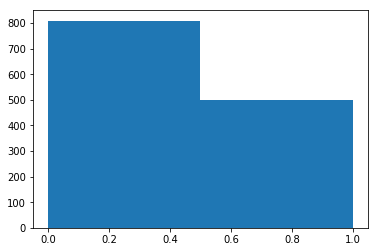

In [169]:
import matplotlib.pyplot as plt
plt.hist(df['survived'], bins=2)
plt.show()

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


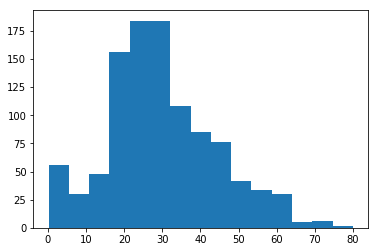

In [170]:
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=15)
plt.show()

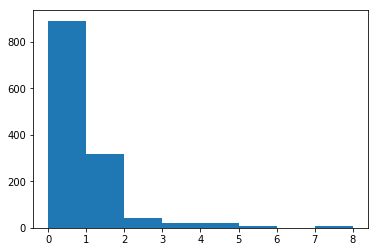

In [171]:
import matplotlib.pyplot as plt
plt.hist(df['sibsp'], bins=8)
plt.show()

In [172]:
sdf = pd.get_dummies(df)
sdf.head()


,pclass,survived,age,sibsp,parch,fare,body,"name_Abbing, Mr. Anthony","name_Abbott, Master. Eugene Joseph","name_Abbott, Mr. Rossmore Edward",...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,1,29.0000,0,0,211.3375,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.9167,1,2,151.5500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,2.0000,1,2,151.5500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,30.0000,1,2,151.5500,135.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,25.0000,1,2,151.5500,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
df = df.fillna(0)
gdf = pd.get_dummies(df[['age','sibsp','parch']])
surv_data_frame = pd.get_dummies(df[['survived']])
#surv_data_frame.head()

In [174]:

extra_gdf = gdf.iloc[1]
gdf = gdf.drop(1)

extra_surv_data_frame = surv_data_frame.iloc[1]
surv_data_frame = surv_data_frame.drop(1)


knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(gdf, surv_data_frame)


predicted_row = knn_classifier.predict([extra_gdf])
print("expected: " + str(extra_surv_data_frame[0]))
print("survived: " + str(predicted_row[0]))

# knn_classifier = KNeighborsClassifier(n_neighbors = 5)

expected: survived    1
Name: 1, dtype: int64
survived: [1]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
